### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: December 8, 6pm**
<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team has now equipped with all the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.


**TEAM Members:** 

    Hang Ding

    Fangling Zhang

    Qingquan Zhao

    Yihao Zhou

    Tongge Zhu

# Background about Elevator Pitch (90 seconds) and Shark Tank

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  **

1) Your business problem to solve:
> In this study case, we have analyzed a dataset from Lending Club, in order to detect and predict bad debt and distinguish the risk level of different kinds of loans.

2) Why the problem is important to solve? 
> In lending companies, there is no doubt of the importance of risk controlling, including evaluating potential losses, identifying potential risks as well as reducing these threats. 

3) What is your idea to solve the problem? 
> we have explored statistical learning methods in role of detecting potential default clients. We are trying to get best predict ‘bad behaviors’ (late payment, default, etc.) by using several classification methods. We also tried tuning parameters of these methods to enhance the analysis algorithms performance. 

4) What differences you could make with your data science approach?
> Traditionally, the loan institute requires some real as mortgages such as houses or cars. Therefore, some potential customers will be excluded if they do not meet the traditional requirement. In our data science approach, the business can be greatly expanded if those customers who are predicted to be loanable in our dataset even if they don't meet the traditional requirement.  

5) Why do you believe the idea deserves the investment of the "sharks"?
> we believe by doing so, the loan company is easier to:
•	Make business decisions
•	Improve loan issue time cycle
•	Eliminate potential lost
•	Increase benefit





### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:

>a. In our original data, there are 73 variables, some of which can be highly correlated. The scales for different features are wildly different, this can have a knock-on effect on our ability to learn.
>b. We have a lot of qualitative variables in our subset. How can we code qualitative variables here? 
>c. How should we model the relationship between p(X) = Pr(Y = 1|X) and X? In this case, 1 coding for the bad behavior (default or late pay in loan status). we must model p(X) using a function that gives outputs between 0 and 1 for all values of X. 

2) Math Solution:
>a. We delete outliers and high-leverage points, then normalize the numeric data. Variables with high correlation or collinearity are deal with. 
>b. The coefficients and their p-values do depend on the choice of dummy variable coding. We have 6 qualitative variables in our cleaned data, so create 5 additional dummy variables and one baseline.
>c. In logistic regression, we use the logistic function:
<img src="formula_1.png">

3) Implementation of the Solution
>To fit the model, we use a method called maximum likelihood. The basic intuition behind using maximum likelihood to fit a logistic regression model is as follows: we seek estimates for β0 and β1 such that the predicted probability of default for each individual, corresponds as closely as possible to the individual’s observed default status. In other words, we try to find and such that plugging these estimates into the model for p(X), yields a number close to one for all individuals who defaulted, and a number close to zero for all individuals who did not. This intuition can be formalized using a mathematical equation called a likelihood function:
<img src="formula_2.png">
>pandas.get_dummies(data)
>linear_model.LogisticRegression()


### Problem 3: The Hacking Part  (20 points)


#### 3.1 First glance on data（Data Visualization）


**The first chart below shows the distribution of dataset**

<img src="loan_grade_chart.png">




**The second chart below shows the distribution of loan grade**

<img src="loan_status_chart.png">

**The third chart below shows the geographic distribution of default rate**

<img src="map_chart.png">

**The fourth chart below shows the geographic distribution of number of loans in each state**

<img src="map_num_loans.png">

**2.2 Preprocessing Data**

In [2]:
import pandas as pd
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np


'dummies'
data = pd.read_csv('clean_126.csv')

data = data.iloc[np.random.permutation(len(data))]

y_target = data["loan_status"]
y_target_list = y_target.values.tolist()
y_target = []
counter0 = 0
counter1 = 0

for i in range(len(y_target_list)):
	if y_target_list[i] == "Late (31-120 days)" or y_target_list[i] == "Charged Off" or y_target_list[i] == "Default":
		y_target.append(1)
		counter1 += 1
	else:
		y_target.append(0)
		counter0 += 1

print(counter0, counter1)
X_Features = data.drop(['loan_status'], 1)
X_Features = pd.get_dummies(X_Features)
print(X_Features.shape)

37637 2363
(40000, 53)


<function matplotlib.pyplot.show>

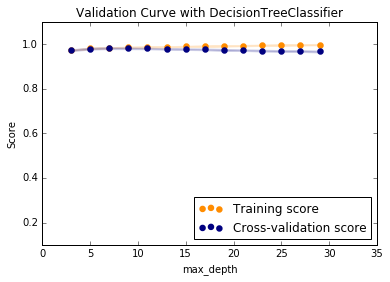

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier as dtc

%matplotlib inline

X, y = X_Features, y_target
param_range = np.arange(3, 30, 2)
train_scores, test_scores = validation_curve(
    dtc(), X, y, param_name="max_depth", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with DecisionTreeClassifier")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.1)
lw = 2
plt.scatter(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.scatter(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="lower right")
plt.show

In [52]:
import IPython
from IPython.display import Image
import pydotplus
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X_Features, y_target, test_size=0.2)

clf = dtc(max_depth=7)
clf.fit(X_train,y_train)

dot_data = tree.export_graphviz(clf, out_file=None,
									feature_names=None,
									class_names=None,
									filled=True, rounded=True,
									special_characters=True)

y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)
print(metrics.classification_report(y_test, y_predicted))

print(cm)


             precision    recall  f1-score   support

          0       0.98      1.00      0.99      7525
          1       0.96      0.69      0.80       475

avg / total       0.98      0.98      0.98      8000

[[7510   15]
 [ 146  329]]


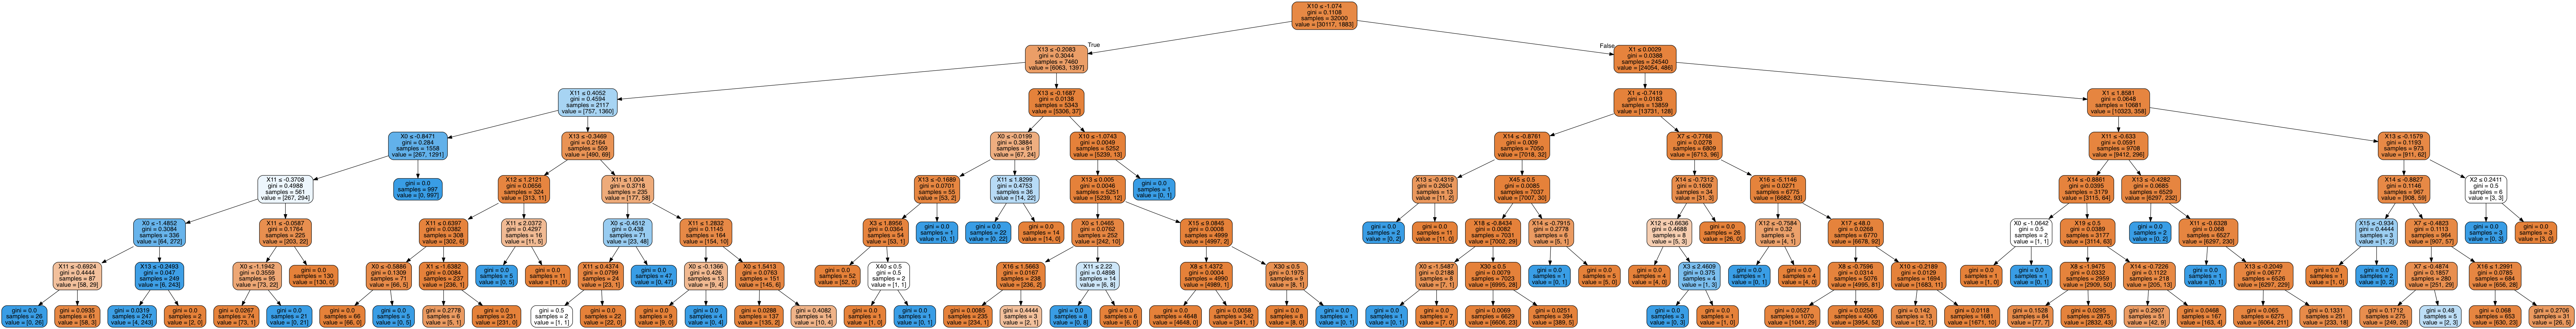

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [54]:
clf = RandomForestClassifier(max_features=None, max_depth=None)
clf.fit(X_train,y_train)

y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)
print(metrics.classification_report(y_test, y_predicted))

print(cm)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      7525
          1       0.99      0.69      0.82       475

avg / total       0.98      0.98      0.98      8000

[[7523    2]
 [ 145  330]]


In [ ]:
**2.4 Further**

In [69]:
from sklearn.model_selection import cross_val_score


data = pd.read_csv('cleaned_data_dummies_001.csv', index_col='Unnamed: 0')

grouped = data.groupby('loan_status')

bad = grouped.get_group(1)
good = grouped.get_group(0)

# print(bad.shape)
# print(good.shape)

for i in range(5, 100, 5):
	goodselect = good.sample(frac=i/100, replace=False)
	frames = [bad,goodselect]
	result = pd.concat(frames)
	print(result.shape) 

	data = result.iloc[np.random.permutation(len(result))]

	y_target = data["loan_status"]
	X_Features = data.drop(['loan_status'], 1)

	X_train, X_test, y_train, y_test = train_test_split(X_Features, y_target, test_size=0.2)

	clf = RandomForestClassifier(max_features=None, max_depth=None)

	print(cross_val_score(clf, X_Features, y_target))
	clf.fit(X_train,y_train)
	y_predicted = clf.predict(X_test)
	cm = metrics.confusion_matrix(y_test, y_predicted)
	print(cm)
	


(4245, 54)
[ 0.83757062  0.82402827  0.82673267]
[[337  42]
 [112 358]]
(6127, 54)
[ 0.88105727  0.88056779  0.88192063]
[[754  28]
 [100 344]]
(8009, 54)
[ 0.91910112  0.90786517  0.91045335]
[[1096   17]
 [ 116  373]]
(9890, 54)
[ 0.9244768   0.92841978  0.92688107]
[[1477   15]
 [ 142  344]]
(11772, 54)
[ 0.93987261  0.9411315   0.93958705]
[[1854   11]
 [ 140  350]]
(13654, 54)
[ 0.94463972  0.94727592  0.94879121]
[[2232    5]
 [ 151  343]]
(15536, 54)
[ 0.95423827  0.95501062  0.95036694]
[[2623    9]
 [ 146  330]]
(17418, 54)
[ 0.95918719  0.95952463  0.95917313]
[[3024    6]
 [ 134  320]]
(19300, 54)
[ 0.96300901  0.96052223  0.96408582]
[[3400    6]
 [ 111  343]]
(21181, 54)
[ 0.96785158  0.96728509  0.96628418]
[[3729    8]
 [ 132  368]]
(23063, 54)
[ 0.96891259  0.97073361  0.96877846]
[[4121   10]
 [ 143  339]]
(24945, 54)
[ 0.97318422  0.97005412  0.97209526]
[[4480    9]
 [ 146  354]]
(26827, 54)
[ 0.97316337  0.97338701  0.97371659]
[[4837    2]
 [ 148  379]]
(28709, 54)

<img src="cv_chart.png">

In [127]:
import pandas as pd
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score



'dummies'
data = pd.read_csv('cleaned_data_dummies_001.csv', index_col='Unnamed: 0')
# y_target = data["loan_status"]
# X_Features = data.drop(['loan_status'], 1)


grouped = data.groupby('loan_status')

bad = grouped.get_group(1)
good = grouped.get_group(0)

# print(bad.shape)
# print(good.shape)


goodselect = good.sample(frac=0.15, replace=False)

	


frames = [bad,goodselect]

result = pd.concat(frames)


print(result.shape) 
# result.to_csv("onetoone_dummies_000.csv")


data = result.iloc[np.random.permutation(len(result))]

y_target = data["loan_status"]
X_Features = data.drop(['loan_status'], 1)


X_train, X_test, y_train, y_test = train_test_split(X_Features, y_target, test_size=0.2)

clf = [DecisionTreeClassifier(), 
		RandomForestClassifier(max_features=None, max_depth=None), 
		SVC(),
		KNeighborsClassifier(),
		LogisticRegression(),
		# AdaBoostClassifier(tree= DecisionTreeClassifier(), n_estimators=200),
		# BaggingClassifier(tree= DecisionTreeClassifier()),
		ExtraTreesClassifier(),
		GradientBoostingClassifier(),
		MLPClassifier(activation="relu", 
					alpha=0.001,
					tol=1e-6,
					batch_size=400,
					hidden_layer_sizes=20,
					solver="adam",
					learning_rate="constant", 
					max_iter=500)]


for c in clf:
    print(c)
    print(cross_val_score(c, X_Features, y_target))
    c.fit(X_train,y_train)
    y_predicted = c.predict(X_test)

    cm = metrics.confusion_matrix(y_test, y_predicted)
    print(cm)
    print(metrics.classification_report(y_test, y_predicted))










(8009, 54)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
[ 0.85430712  0.86142322  0.85687523]
[[1031   92]
 [  94  385]]
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1123
          1       0.81      0.80      0.81       479

avg / total       0.88      0.88      0.88      1602

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
[ 0.90561798  0.

In [113]:

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('cleaned_data_dummies_001.csv', index_col='Unnamed: 0')
grouped = data.groupby('loan_status')

bad = grouped.get_group(1)
good = grouped.get_group(0)

goodselect = good.sample(frac=0.05, replace=False)

frames = [bad,goodselect]

result = pd.concat(frames)


print(result.shape) 

data = result.iloc[np.random.permutation(len(result))]

y_target = data["loan_status"]
X_Features = data.drop(['loan_status'], 1)


X_train, X_test, y_train, y_test = train_test_split(X_Features, y_target, test_size=0.2)


pipeline = Pipeline([
        ('clf', RandomForestClassifier()),
    ])


    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
parameters = {
        'clf__max_depth':[3, 7, 9, 15, 30, 50],
    }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train,y_train)
    
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))
        
# Print the classification report
y_predicted = grid_search.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

(4245, 54)
0 params - {'clf__max_depth': 3}; mean - 0.74; std - 0.01
1 params - {'clf__max_depth': 7}; mean - 0.82; std - 0.02
2 params - {'clf__max_depth': 9}; mean - 0.82; std - 0.00
3 params - {'clf__max_depth': 15}; mean - 0.81; std - 0.00
4 params - {'clf__max_depth': 30}; mean - 0.82; std - 0.01
5 params - {'clf__max_depth': 50}; mean - 0.82; std - 0.01
             precision    recall  f1-score   support

          0       0.81      0.78      0.80       393
          1       0.82      0.84      0.83       456

avg / total       0.81      0.81      0.81       849

[[307  86]
 [ 72 384]]


In [114]:
pipeline = Pipeline([
        ('clf', DecisionTreeClassifier()),
    ])


    # TASK: Build a grid search to find out whether unigrams or bigrams are
    # more useful.
    # Fit the pipeline on the training set using grid search for the parameters
parameters = {
        'clf__max_depth':[3, 7, 9, 15, 30, 50],
    }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(X_train,y_train)
    
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
                % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))
        
# Print the classification report
y_predicted = grid_search.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

0 params - {'clf__max_depth': 3}; mean - 0.83; std - 0.01
1 params - {'clf__max_depth': 7}; mean - 0.82; std - 0.01
2 params - {'clf__max_depth': 9}; mean - 0.81; std - 0.00
3 params - {'clf__max_depth': 15}; mean - 0.80; std - 0.00
4 params - {'clf__max_depth': 30}; mean - 0.80; std - 0.01
5 params - {'clf__max_depth': 50}; mean - 0.80; std - 0.00
             precision    recall  f1-score   support

          0       0.76      0.95      0.85       393
          1       0.95      0.75      0.84       456

avg / total       0.86      0.84      0.84       849

[[374  19]
 [115 341]]


In [121]:
clf = RandomForestClassifier(max_features=None, max_depth=None)
clf.fit(X_train,y_train)

y_predicted = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_predicted)
print(metrics.classification_report(y_test, y_predicted))
print(clf.feature_importances_)  

print(cm)

             precision    recall  f1-score   support

          0       0.79      0.89      0.84       393
          1       0.90      0.80      0.84       456

avg / total       0.85      0.84      0.84       849

[  3.74136427e-02   6.93938507e-02   3.66693305e-02   5.17365766e-03
   6.71057151e-03   1.67013512e-02   5.25178431e-03   1.67893697e-02
   2.57675775e-02   2.15258902e-02   2.92731717e-01   3.88683532e-02
   2.00822738e-02   2.69305520e-01   2.51081520e-02   1.62929947e-02
   2.26970480e-02   2.33756667e-03   1.96841755e-02   1.54763689e-03
   2.03407447e-03   1.94584717e-03   3.18014609e-03   3.41564833e-03
   1.63285483e-03   1.88587511e-03   1.64525564e-03   2.52964297e-03
   7.23597994e-04   1.47094710e-03   1.31936955e-03   2.05971523e-03
   0.00000000e+00   2.41161821e-03   2.36065346e-03   2.42478989e-03
   2.21375401e-03   3.12762878e-03   5.40623842e-04   2.34929911e-03
   3.03706941e-03   1.15769165e-03   0.00000000e+00   2.20698055e-04
   3.45234079e-04   5.6330

First glance on data*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu and wliu3@wpi.edu with the subject: "[DS501] Case study 4-TEAM NUMBER ???".

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_Features, y_target, test_size=0.2)

logit = sm.Logit(y_train,X_train)

result = logit.fit()
print(result.summary())

         Current function value: 0.228102
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 6407
Model:                          Logit   Df Residuals:                     6358
Method:                           MLE   Df Model:                           48
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                  0.6246
Time:                        03:18:19   Log-Likelihood:                -1461.4
converged:                      False   LL-Null:                       -3893.2
                                        LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
funded_amnt_inv                        20.8667      1.909     10.930      0.000        17.125 

/Users/tonggezhu/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
